In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import Demand
import Date

In [3]:
# datewanted = Date.getdatewanted(1)
T = Demand.getHEATdemand(1)

In [4]:
T.loc[24] = 0
T.rename(index={24:'24:00'}, inplace=True)
T

,Heating Demand (kWh)
00:00,26.066684
01:00,20.659165
02:00,21.280299
03:00,23.655223
04:00,23.253313
05:00,20.841851
06:00,18.393853
07:00,0.000000
08:00,0.000000
09:00,0.000000


In [5]:
T['TESA Int Gen - Occupants(weekday)'] = [0,0,0,0,0,0,0,0,130,130,130,130,130,130,130,130,130,0,0,0,0,0,0,0,0]
T['TESA Int Gen - Occupants(weekday)'] = T['TESA Int Gen - Occupants(weekday)']*750/1000



In [6]:
T['TESA Int Gen - Occupants(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]



In [7]:
T['TESA Int Gen - Lighting(weekday)'] = [0,0,0,0,0,0,0,0,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,0,0,0,0,0,0,0,0]



In [8]:
T['TESA Int Gen - Lighting(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


In [9]:
T['TESA Int Gen - Monitors(weekday)'] = [0,0,0,0,0,0,0,0,17.475,17.475,17.475,17.475,17.475,17.475,17.475,17.475,17.475,0,0,0,0,0,0,0,0]




In [10]:
T['TESA Int Gen - Monitors(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]




In [11]:
T['TESA Int Gen - Computers(weekday)'] = [12.225,12.225,12.225,12.225,12.225,12.225,12.225,12.225,61.125,61.125,61.125,61.125,61.125,61.125,61.125,61.125,61.125,12.225,12.225,12.225,12.225,12.225,12.225,12.225,12.225]



In [12]:
T['TESA Int Gen - Computers(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


In [13]:
T['TESA Total Int Gen - weekend'] = T['TESA Int Gen - Computers(weekend)']+T['TESA Int Gen - Monitors(weekend)']+T['TESA Int Gen - Lighting(weekend)']+T['TESA Int Gen - Occupants(weekend)']
T['TESA Total Int Gen - weekday'] = T['TESA Int Gen - Computers(weekday)']+T['TESA Int Gen - Monitors(weekday)']+T['TESA Int Gen - Lighting(weekday)']+T['TESA Int Gen - Occupants(weekday)']



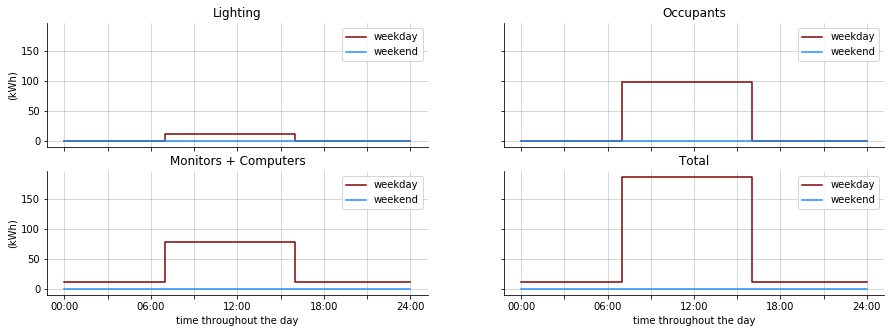

In [14]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
color1 = 'maroon'
color2 = 'dodgerblue'
fig, ax = plt.subplots(2,2,sharey=True,sharex=True,figsize=[15,5])

ax[0,0].step(x, T['TESA Int Gen - Lighting(weekday)'],color=color1, label='weekday', alpha = 5)
ax[0,0].step(x, T['TESA Int Gen - Lighting(weekend)'],color=color2, label='weekend')
ax[0,0].set_ylabel('(kWh)')
ax[0,0].legend()
ax[0,0].title.set_text('Lighting')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].grid(lw=0.5)

ax[0,1].step(x, T['TESA Int Gen - Occupants(weekday)'],color=color1, label='weekday')
ax[0,1].step(x, T['TESA Int Gen - Occupants(weekend)'],color=color2, label='weekend')
ax[0,1].legend()
ax[0,1].title.set_text('Occupants')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].grid(lw=0.5)

ax[1,0].step(x, T['TESA Int Gen - Monitors(weekday)']+T['TESA Int Gen - Computers(weekday)'],color=color1, label='weekday')
ax[1,0].step(x, T['TESA Int Gen - Monitors(weekend)']+T['TESA Int Gen - Computers(weekend)'],color=color2, label='weekend')
ax[1,0].set_xticks((0,3,6,9,12,15,18,21,24))
ax[1,0].set_xticklabels(('00:00','','06:00','','12:00','','18:00','','24:00'))
ax[1,0].set_xlabel('time throughout the day')
ax[1,0].set_ylabel('(kWh)')
ax[1,0].legend()
ax[1,0].title.set_text('Monitors + Computers')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].grid(lw=0.5)

ax[1,1].step(x, T['TESA Total Int Gen - weekday'],color=color1,label='weekday')
ax[1,1].step(x, T['TESA Total Int Gen - weekend'],color=color2, label='weekend')
ax[1,1].set_xlabel('time throughout the day')
ax[1,1].legend()
ax[1,1].title.set_text('Total')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].grid(lw=0.5)

# fig.suptitle('Time throughout the day', y=0)
# fig.ylabel('Internal Generation (kW)')
# fig.ylabel('Time throughout the day')

In [15]:
def hello(daywanted):
    
    T = Demand.getHEATdemand(daywanted)
    
    T['TESA Int Gen - Occupants(weekday)'] = [0,0,0,0,0,0,0,0,130,130,130,130,130,130,130,130,130,0,0,0,0,0,0,0]
    T['TESA Int Gen - Occupants(weekday)'] = T['TESA Int Gen - Occupants(weekday)']*750/1000
    T['TESA Int Gen - Occupants(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    T['TESA Int Gen - Lighting(weekday)'] = [0,0,0,0,0,0,0,0,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,0,0,0,0,0,0,0]
    T['TESA Int Gen - Lighting(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    T['TESA Int Gen - Monitors(weekday)'] = [0,0,0,0,0,0,0,0,17.475,17.475,17.475,17.475,17.475,17.475,17.475,17.475,17.475,0,0,0,0,0,0,0]
    T['TESA Int Gen - Monitors(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    T['TESA Int Gen - Computers(weekday)'] = [12.225,12.225,12.225,12.225,12.225,12.225,12.225,12.225,61.125,61.125,61.125,61.125,61.125,61.125,61.125,61.125,61.125,12.225,12.225,12.225,12.225,12.225,12.225,12.225]
    T['TESA Int Gen - Computers(weekend)'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    T['TESA Total Int Gen - weekend'] = T['TESA Int Gen - Computers(weekend)']+T['TESA Int Gen - Monitors(weekend)']+T['TESA Int Gen - Lighting(weekend)']+T['TESA Int Gen - Occupants(weekend)']
    T['TESA Total Int Gen - weekday'] = T['TESA Int Gen - Computers(weekday)']+T['TESA Int Gen - Monitors(weekday)']+T['TESA Int Gen - Lighting(weekday)']+T['TESA Int Gen - Occupants(weekday)']
    
    

In [16]:
Demand.getHEATdemand(1)

,Heating Demand (kWh)
00:00,26.066684
01:00,20.659165
02:00,21.280299
03:00,23.655223
04:00,23.253313
05:00,20.841851
06:00,18.393853
07:00,0.000000
08:00,0.000000
09:00,0.000000


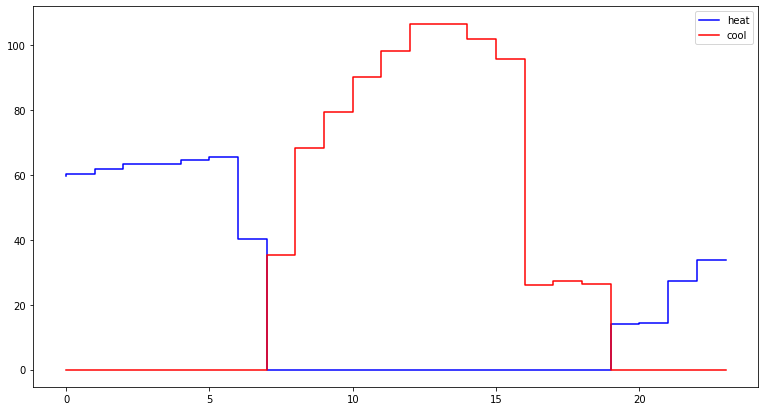

In [17]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

fig, ax = plt.subplots(sharey=True,sharex=True,figsize=[13,7])
ax.step(x,Demand.getHEATdemand(364),color='blue',label='heat')
ax.step(x,Demand.getCOOLdemand(364),color='red',label='cool')
ax.legend()